In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV


In [2]:
ff_data= pd.read_csv('./forestfires.csv')

In [3]:
ff_data.head()

month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  ...  monthfeb  \
0   mar  fri  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0  ...         0   
1   oct  tue  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0  ...         0   
2   oct  sat  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0  ...         0   
3   mar  fri  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2  ...         0   
4   mar  sun  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0  ...         0   

   monthjan  monthjul  monthjun  monthmar  monthmay  monthnov  monthoct  \
0         0         0         0         1         0         0         0   
1         0         0         0         0         0         0         1   
2         0         0         0         0         0         0         1   
3         0         0         0         1         0         0         0   
4         0         0         0         1         0         0         0   

   monthsep  size_category  
0         0          small  
1         0          small  
2         0          small  
3         0          small  
4         0          small  

[5 rows x 31 columns]

In [4]:
ff_data.shape

(517, 31)

In [5]:
ff_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [6]:
ff_data.describe()

FFMC         DMC          DC         ISI        temp          RH  \
count  517.000000  517.000000  517.000000  517.000000  517.000000  517.000000   
mean    90.644681  110.872340  547.940039    9.021663   18.889168   44.288201   
std      5.520111   64.046482  248.066192    4.559477    5.806625   16.317469   
min     18.700000    1.100000    7.900000    0.000000    2.200000   15.000000   
25%     90.200000   68.600000  437.700000    6.500000   15.500000   33.000000   
50%     91.600000  108.300000  664.200000    8.400000   19.300000   42.000000   
75%     92.900000  142.400000  713.900000   10.800000   22.800000   53.000000   
max     96.200000  291.300000  860.600000   56.100000   33.300000  100.000000   

             wind        rain         area      dayfri  ...    monthdec  \
count  517.000000  517.000000   517.000000  517.000000  ...  517.000000   
mean     4.017602    0.021663    12.847292    0.164410  ...    0.017408   
std      1.791653    0.295959    63.655818    0.371006  ...    0.130913   
min      0.400000    0.000000     0.000000    0.000000  ...    0.000000   
25%      2.700000    0.000000     0.000000    0.000000  ...    0.000000   
50%      4.000000    0.000000     0.520000    0.000000  ...    0.000000   
75%      4.900000    0.000000     6.570000    0.000000  ...    0.000000   
max      9.400000    6.400000  1090.840000    1.000000  ...    1.000000   

         monthfeb    monthjan    monthjul    monthjun    monthmar    monthmay  \
count  517.000000  517.000000  517.000000  517.000000  517.000000  517.000000   
mean     0.038685    0.003868    0.061896    0.032882    0.104449    0.003868   
std      0.193029    0.062137    0.241199    0.178500    0.306138    0.062137   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

         monthnov    monthoct    monthsep  
count  517.000000  517.000000  517.000000  
mean     0.001934    0.029014    0.332689  
std      0.043980    0.168007    0.471632  
min      0.000000    0.000000    0.000000  
25%      0.000000    0.000000    0.000000  
50%      0.000000    0.000000    0.000000  
75%      0.000000    0.000000    1.000000  
max      1.000000    1.000000    1.000000  

[8 rows x 28 columns]

In [7]:
ff_data.isnull().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [8]:
ff_data.skew()

<ipython-input-8-20db7fb79c38>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  ff_data.skew()


FFMC        -6.575606
DMC          0.547498
DC          -1.100445
ISI          2.536325
temp        -0.331172
RH           0.862904
wind         0.571001
rain        19.816344
area        12.846934
dayfri       1.816105
daymon       2.043956
daysat       1.835290
daysun       1.637920
daythu       2.375268
daytue       2.291255
daywed       2.594172
monthapr     7.401340
monthaug     0.603696
monthdec     7.401340
monthfeb     4.798308
monthjan    16.031038
monthjul     3.646828
monthjun     5.254127
monthmar     2.594172
monthmay    16.031038
monthnov    22.737634
monthoct     5.628522
monthsep     0.712255
dtype: float64

In [9]:
ff_data.kurtosis()

<ipython-input-9-9686657fd036>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  ff_data.kurtosis()


FFMC         67.066041
DMC           0.204822
DC           -0.245244
ISI          21.458037
temp          0.136166
RH            0.438183
wind          0.054324
rain        421.295964
area        194.140721
dayfri        1.303265
daymon        2.186198
daysat        1.373589
daysun        0.685418
daythu        3.656027
daytue        3.262455
daywed        4.748083
monthapr     52.984784
monthaug     -1.641918
monthdec     52.984784
monthfeb     21.105386
monthjan    255.984443
monthjul     11.343218
monthjun     25.705276
monthmar      4.748083
monthmay    255.984443
monthnov    517.000000
monthoct     29.795509
monthsep     -1.498505
dtype: float64

In [35]:
ff_data.corr()

FFMC       DMC        DC       ISI      temp        RH  \
FFMC           1.000000  0.382619  0.330512  0.531805  0.431532 -0.300995   
DMC            0.382619  1.000000  0.682192  0.305128  0.469594  0.073795   
DC             0.330512  0.682192  1.000000  0.229154  0.496208 -0.039192   
ISI            0.531805  0.305128  0.229154  1.000000  0.394287 -0.132517   
temp           0.431532  0.469594  0.496208  0.394287  1.000000 -0.527390   
RH            -0.300995  0.073795 -0.039192 -0.132517 -0.527390  1.000000   
wind          -0.028485 -0.105342 -0.203466  0.106826 -0.227116  0.069410   
rain           0.056702  0.074790  0.035861  0.067668  0.069491  0.099751   
area           0.040122  0.072994  0.049383  0.008258  0.097844 -0.075519   
dayfri         0.019306 -0.012010 -0.004220  0.046695 -0.071949  0.064506   
daymon        -0.059396 -0.107921 -0.052993 -0.158601 -0.136529  0.009376   
daysat        -0.019637 -0.003653 -0.035189 -0.038585  0.034899 -0.023869   
daysun        -0.089517  0.025355 -0.001431 -0.003243  0.014403  0.136220   
daythu         0.071730  0.087672  0.051859 -0.022406  0.051432 -0.123061   
daytue         0.011225  0.000016  0.028368  0.068610  0.035630 -0.014211   
daywed         0.093908  0.017939  0.024803  0.125415  0.090580 -0.087508   
monthapr      -0.117199 -0.197543 -0.268211 -0.106478 -0.157051  0.021235   
monthaug       0.228103  0.497928  0.279361  0.334639  0.351404  0.054761   
monthdec      -0.137044 -0.176301 -0.105642 -0.162322 -0.329648 -0.047714   
monthfeb      -0.281535 -0.317899 -0.399277 -0.249777 -0.320015  0.140430   
monthjan      -0.454771 -0.105647 -0.115064 -0.103588 -0.146520  0.170923   
monthjul       0.031833 -0.001946 -0.100887  0.020982  0.142588  0.013185   
monthjun      -0.040634 -0.050403 -0.186183  0.111516  0.051015  0.009382   
monthmar      -0.074327 -0.407404 -0.650427 -0.143520 -0.341797 -0.089836   
monthmay      -0.037230 -0.081980 -0.114209 -0.060493 -0.045540  0.086822   
monthnov      -0.088964 -0.074218 -0.078380 -0.076559 -0.053798 -0.035885   
monthoct      -0.005998 -0.187632  0.093279 -0.071154 -0.053513 -0.072334   
monthsep       0.076609  0.110907  0.531857 -0.068877  0.088006 -0.062596   
size_category -0.022063 -0.034715 -0.019428  0.008726 -0.006021  0.045243   

                   wind      rain      area    dayfri  ...  monthfeb  \
FFMC          -0.028485  0.056702  0.040122  0.019306  ... -0.281535   
DMC           -0.105342  0.074790  0.072994 -0.012010  ... -0.317899   
DC            -0.203466  0.035861  0.049383 -0.004220  ... -0.399277   
ISI            0.106826  0.067668  0.008258  0.046695  ... -0.249777   
temp          -0.227116  0.069491  0.097844 -0.071949  ... -0.320015   
RH             0.069410  0.099751 -0.075519  0.064506  ...  0.140430   
wind           1.000000  0.061119  0.012317  0.118090  ... -0.029431   
rain           0.061119  1.000000 -0.007366 -0.004261  ... -0.014698   
area           0.012317 -0.007366  1.000000 -0.052911  ... -0.020732   
dayfri         0.118090 -0.004261 -0.052911  1.000000  ...  0.046323   
daymon        -0.063881 -0.029945 -0.021206 -0.181293  ...  0.003933   
daysat        -0.063799 -0.032271  0.087868 -0.195372  ...  0.020406   
daysun         0.027981 -0.017872 -0.020463 -0.210462  ...  0.008416   
daythu        -0.062553 -0.026798  0.020121 -0.162237  ... -0.042278   
daytue         0.053396  0.139311 -0.001333 -0.166728  ... -0.014491   
daywed        -0.019965 -0.020744 -0.011452 -0.151487  ... -0.035713   
monthapr       0.048266 -0.009752 -0.008280 -0.019140  ... -0.026701   
monthaug       0.028577  0.093101 -0.004187 -0.100837  ... -0.149116   
monthdec       0.269702 -0.009752  0.001010 -0.019140  ... -0.026701   
monthfeb      -0.029431 -0.014698 -0.020732  0.046323  ...  1.000000   
monthjan      -0.070245 -0.004566 -0.012589 -0.027643  ... -0.012501   
monthjul      -0.040645 -0.013390  0.006149 -0.048969  ... -0.051528   
monthjun       0.012124 -0.013510 -0.020314  0.00600

/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Axes: xlabel='temp', ylabel='size_category'>

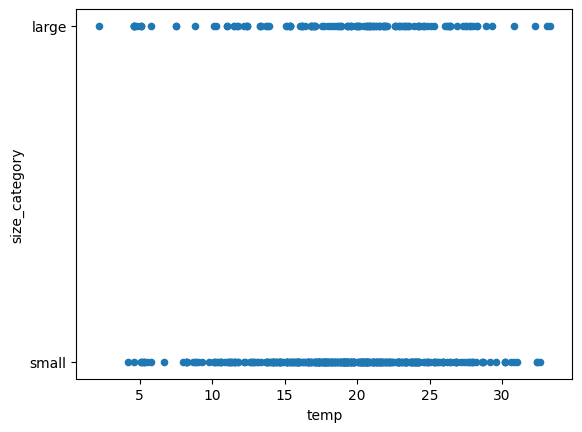

In [10]:
ff_data.plot(kind= "scatter", x="temp", y="size_category")

In [32]:
sns.boxplot(x="FFMC", data=ff_data)

<Axes: xlabel='FFMC'>

<Axes: xlabel='rain'>

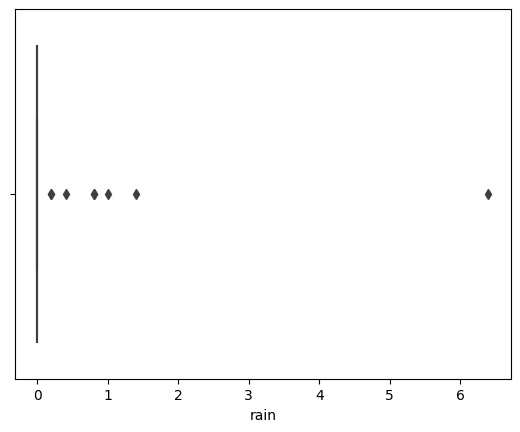

In [33]:
sns.boxplot(x="rain", data=ff_data)

In [34]:
sns.violinplot(x="area", data=ff_data)

<Axes: xlabel='area'>

<Axes: >

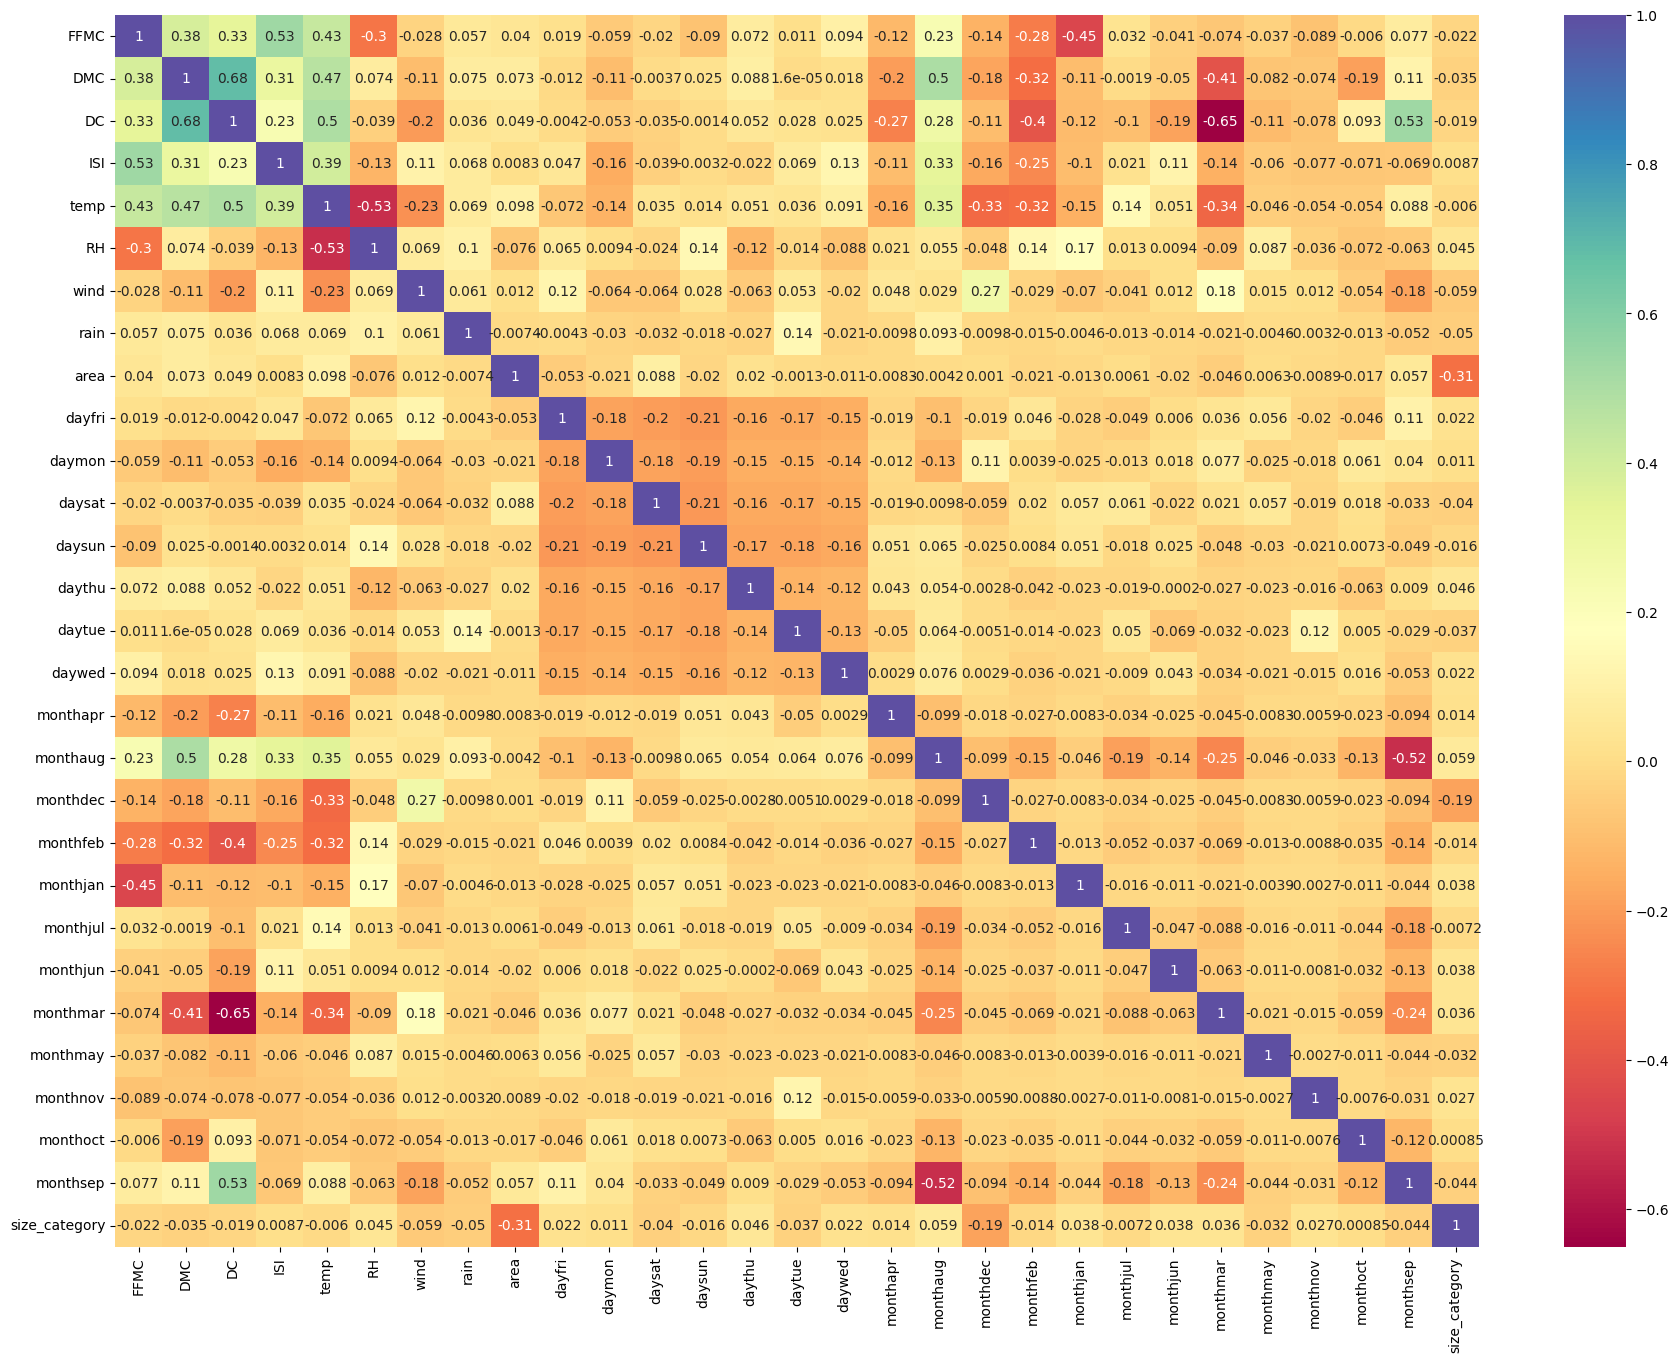

In [40]:
plt.figure(figsize = (22,16))
sns.heatmap(data = ff_data.corr(), annot= True, cmap = "Spectral")

In [41]:
ff_data.plot(kind= "scatter", x="DMC", y="DC", c="yellowgreen")

/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Axes: xlabel='DMC', ylabel='DC'>

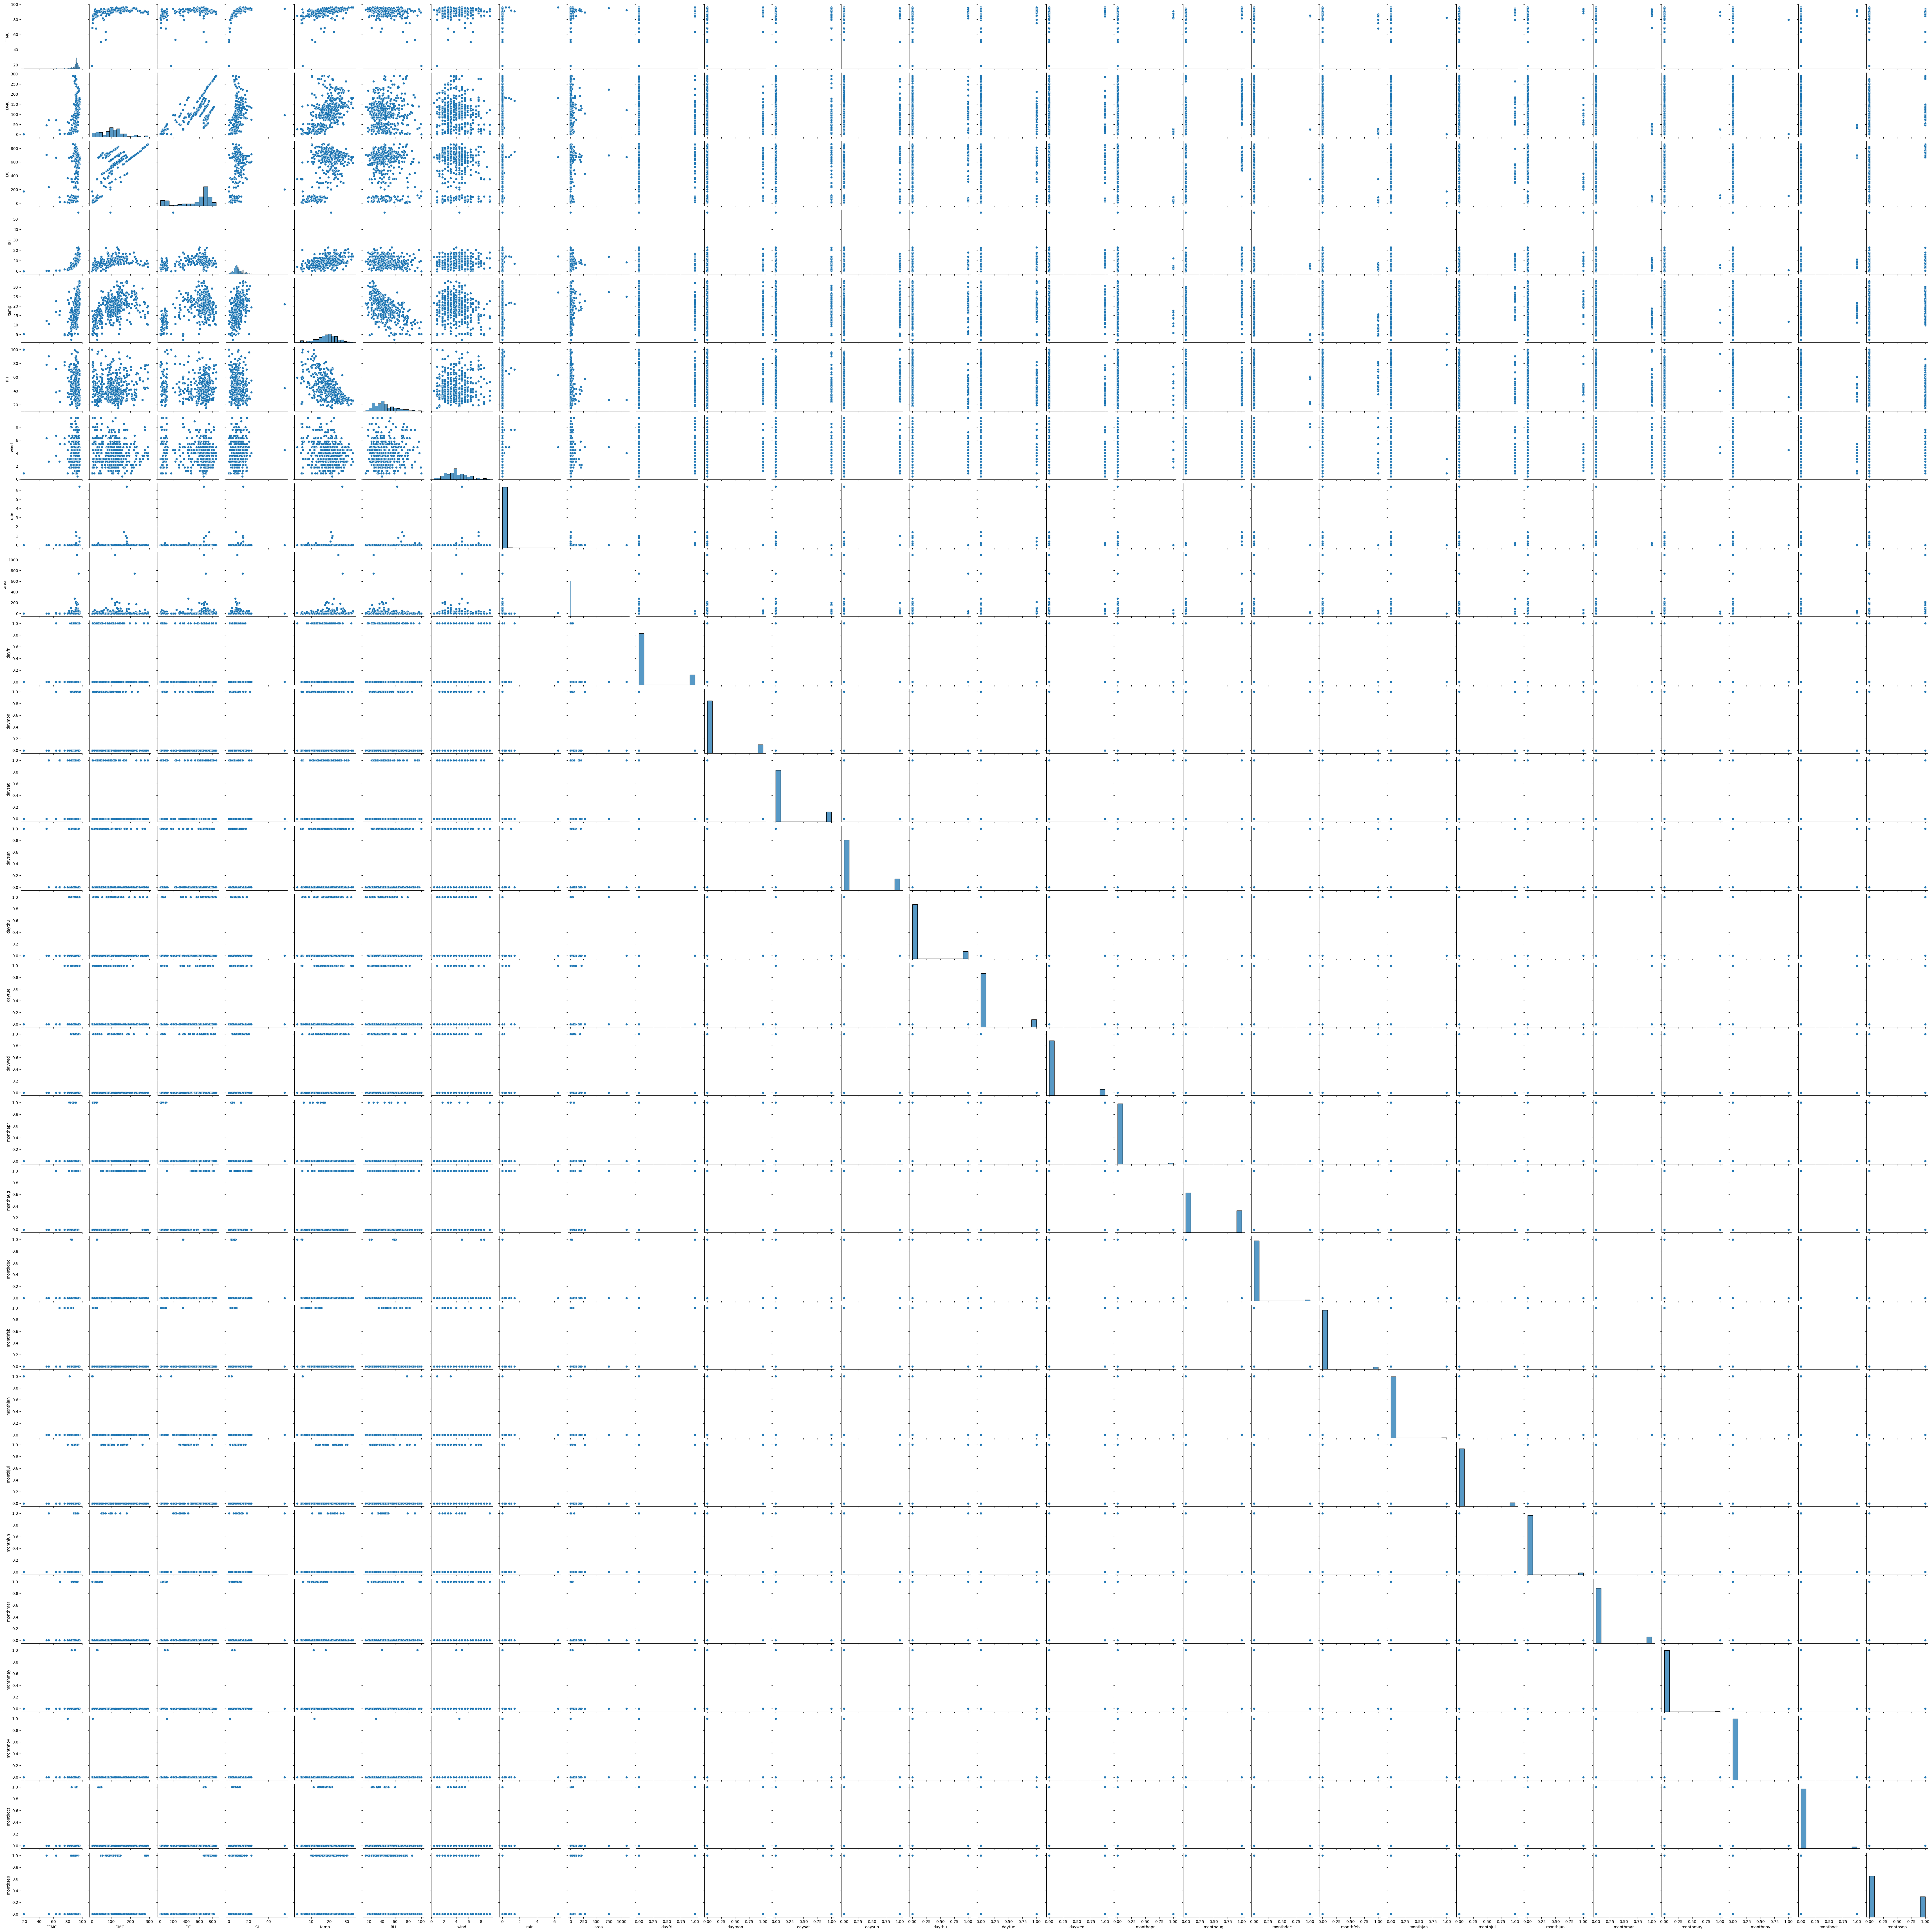

In [11]:
sns.pairplot(ff_data)

In [12]:
ff_data = ff_data.drop('month', axis =1)
ff_data = ff_data.drop('day' , axis =1)

In [13]:
ff_data.head()

FFMC   DMC     DC  ISI  temp  RH  wind  rain  area  dayfri  ...  monthfeb  \
0  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0   0.0       1  ...         0   
1  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0   0.0       0  ...         0   
2  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0   0.0       0  ...         0   
3  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2   0.0       1  ...         0   
4  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0   0.0       0  ...         0   

   monthjan  monthjul  monthjun  monthmar  monthmay  monthnov  monthoct  \
0         0         0         0         1         0         0         0   
1         0         0         0         0         0         0         1   
2         0         0         0         0         0         0         1   
3         0         0         0         1         0         0         0   
4         0         0         0         1         0         0         0   

   monthsep  size_category  
0         0          small  
1         0          small  
2         0          small  
3         0          small  
4         0          small  

[5 rows x 29 columns]

In [14]:
labelEncoder = LabelEncoder()
ff_data.iloc[:,28] = labelEncoder.fit_transform(ff_data.iloc[:,28])

In [15]:
X = ff_data.iloc[:, 0:28]
Y = ff_data.iloc[:, 28]

In [16]:
X

FFMC    DMC     DC   ISI  temp  RH  wind  rain   area  dayfri  ...  \
0    86.2   26.2   94.3   5.1   8.2  51   6.7   0.0   0.00       1  ...   
1    90.6   35.4  669.1   6.7  18.0  33   0.9   0.0   0.00       0  ...   
2    90.6   43.7  686.9   6.7  14.6  33   1.3   0.0   0.00       0  ...   
3    91.7   33.3   77.5   9.0   8.3  97   4.0   0.2   0.00       1  ...   
4    89.3   51.3  102.2   9.6  11.4  99   1.8   0.0   0.00       0  ...   
..    ...    ...    ...   ...   ...  ..   ...   ...    ...     ...  ...   
512  81.6   56.7  665.6   1.9  27.8  32   2.7   0.0   6.44       0  ...   
513  81.6   56.7  665.6   1.9  21.9  71   5.8   0.0  54.29       0  ...   
514  81.6   56.7  665.6   1.9  21.2  70   6.7   0.0  11.16       0  ...   
515  94.4  146.0  614.7  11.3  25.6  42   4.0   0.0   0.00       0  ...   
516  79.5    3.0  106.7   1.1  11.8  31   4.5   0.0   0.00       0  ...   

     monthdec  monthfeb  monthjan  monthjul  monthjun  monthmar  monthmay  \
0           0         0         0         0         0         1         0   
1           0         0         0         0         0         0         0   
2           0         0         0         0         0         0         0   
3           0         0         0         0         0         1         0   
4           0         0         0         0         0         1         0   
..        ...       ...       ...       ...       ...       ...       ...   
512         0         0         0         0         0         0         0   
513         0         0         0         0         0         0         0   
514         0         0         0         0         0         0         0   
515         0         0         0         0         0         0         0   
516         0         0         0         0         0         0         0   

     monthnov  monthoct  monthsep  
0           0         0         0  
1           0         1         0  
2           0         1         0  
3           0         0         0  
4           0         0         0  
..        ...       ...       ...  
512         0         0         0  
513         0         0         0  
514         0         0         0  
515         0         0         0  
516         1         0         0  

[517 rows x 28 columns]

In [17]:
Y

0      1
1      1
2      1
3      1
4      1
      ..
512    0
513    0
514    0
515    1
516    1
Name: size_category, Length: 517, dtype: int64

In [18]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size =0.2)

In [19]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(x_train, y_train)
y_pred = svm.predict(x_test)

In [20]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
acc = accuracy_score(y_test, y_pred) * 100
print(acc)

75.96153846153845


In [21]:
confusion_matrix(y_test, y_pred)

array([[ 2, 25],
       [ 0, 77]])

In [22]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.07      0.14        27
           1       0.75      1.00      0.86        77

    accuracy                           0.76       104
   macro avg       0.88      0.54      0.50       104
weighted avg       0.82      0.76      0.67       104



In [23]:
svm_param = SVC(C= 10, gamma = 100,kernel='rbf')
svm_param.fit(x_train, y_train)
y_pred_2 = svm_param.predict(x_test)

In [24]:
print(confusion_matrix(y_test, y_pred_2))

[[ 0 27]
 [ 0 77]]


In [25]:
print(classification_report(y_test, y_pred_2))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        27
           1       0.74      1.00      0.85        77

    accuracy                           0.74       104
   macro avg       0.37      0.50      0.43       104
weighted avg       0.55      0.74      0.63       104



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [26]:
clf = SVC()
#param_grid = [{'kernel':['poly'],'gamma':[100,5,15,0.5],'C':[19,14,13,12,11,10,0.1,0.001] }]
param_grid = [{'kernel':['rbf','poly'],'gamma':[100,5,15,0.5],'C':[12,11,10,0.1,0.001] }]
gsv = GridSearchCV(clf,param_grid,cv=10)
gsv.fit(x_test, y_test)
print(gsv.best_params_)

{'C': 12, 'gamma': 100, 'kernel': 'poly'}


In [27]:
clf_final = SVC(C =12, gamma = 100, kernel = 'poly')
clf_final.fit(x_train, y_train)
y_pred_final = clf_final.predict(x_test)

In [28]:
confusion_matrix(y_test, y_pred_final)

array([[24,  3],
       [ 0, 77]])

In [29]:
print(classification_report(y_test, y_pred_final))

              precision    recall  f1-score   support

           0       1.00      0.89      0.94        27
           1       0.96      1.00      0.98        77

    accuracy                           0.97       104
   macro avg       0.98      0.94      0.96       104
weighted avg       0.97      0.97      0.97       104



In [30]:
acc = accuracy_score(y_test, y_pred_final) * 100
print(acc)

97.11538461538461
